# Toy example of visualizing the weights in the network

In [1]:
import keras as k
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
y_train_bin = k.utils.np_utils.to_categorical(y_train)
y_test_bin = k.utils.np_utils.to_categorical(y_test)

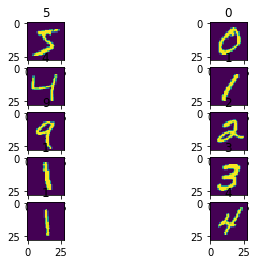

In [4]:
fig, axes = plt.subplots(nrows=5, ncols=2)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i,:,:])
    ax.set_title(y_train[i])

## Define NN
We'll have 2 layers: in the bottom layer, each neuron represents the input. We have 10 outputs for 10 classes

In [5]:
m = k.models.Sequential()
m.add(k.layers.Flatten(input_shape=(28,28)))
#m.add(k.layers.Dense(784, activation='linear'))
m.add(k.layers.Dense(10, activation='softmax'))
m.summary()
m.compile(k.optimizers.Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_1 (Flatten)              (None, 784)           0           flatten_input_1[0][0]            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            7850        flatten_1[0][0]                  
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
____________________________________________________________________________________________________


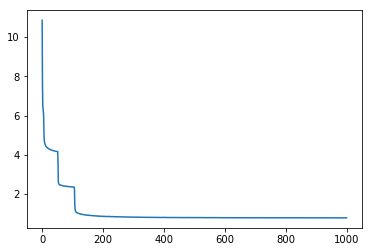

In [6]:
h = m.fit(X_train,y_train_bin, nb_epoch=1000, verbose = False)

plt.plot(h.history['loss'])

# Access the weights
You can retrieve the weights of each layer by accessing the layer in the layers list with get_weights() function which will give the weights (at idx 0) separated from the biases  (at idx 1)

In [7]:
m.layers[1].get_weights()

[array([[ 0.03025518, -0.02725945, -0.01454134, ...,  0.01463794,
         -0.01041457, -0.07964846],
        [ 0.01242182, -0.04364488, -0.07369483, ...,  0.07521722,
          0.00960162,  0.05098822],
        [ 0.07074671,  0.06425983, -0.08177932, ...,  0.08487476,
          0.07361958, -0.01305426],
        ..., 
        [ 0.03182974, -0.01870914, -0.07937862, ...,  0.06142998,
         -0.0525324 , -0.01246686],
        [ 0.03994287, -0.05160827,  0.05804234, ...,  0.07831077,
          0.07189935, -0.03227818],
        [-0.03484721, -0.0578264 , -0.05770797, ...,  0.06796829,
          0.00540132,  0.08390196]], dtype=float32),
 array([-0.36686781,  0.11706253, -0.03319129, -0.64456224,  1.14065146,
         2.84876418, -0.2575641 ,  1.00930703, -3.10342646, -1.0600816 ], dtype=float32)]

In [8]:
m.layers[1].get_weights()[0].shape

(784, 10)

# Visualize the weights "the Hinton way"

In [9]:
# I use here code from https://gist.github.com/dwf/292018 to visualize the weights
# Thanks to dwf!
def _blob(x, y, area, colour):
    """
    Draws a square-shaped blob with the given area (< 1) at
    the given coordinates.
    """
    hs = np.sqrt(area) / 2
    xcorners = np.array([x - hs, x + hs, x + hs, x - hs])
    ycorners = np.array([y - hs, y - hs, y + hs, y + hs])
    plt.fill(xcorners, ycorners, colour, edgecolor=colour)

def hinton(W, maxweight=None):
    """
    Draws a Hinton diagram for visualizing a weight matrix. 
    Temporarily disables matplotlib interactive mode if it is on, 
    otherwise this takes forever.
    """
    reenable = False
    if plt.isinteractive():
        plt.ioff()
    
    plt.clf()
    height, width = W.shape
    if not maxweight:
        maxweight = 2**np.ceil(np.log(np.max(np.abs(W)))/np.log(2))
        
    plt.fill(np.array([0, width, width, 0]), 
             np.array([0, 0, height, height]),
             'gray')
    
    plt.axis('off')
    plt.axis('equal')
    for x in range(width):
        for y in range(height):
            _x = x+1
            _y = y+1
            w = W[y, x]
            if w > 0:
                _blob(_x - 0.5,
                      height - _y + 0.5,
                      min(1, w/maxweight),
                      'white')
            elif w < 0:
                _blob(_x - 0.5,
                      height - _y + 0.5, 
                      min(1, -w/maxweight), 
                      'black')
    if reenable:
        plt.ion()


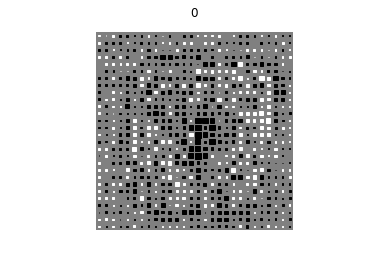

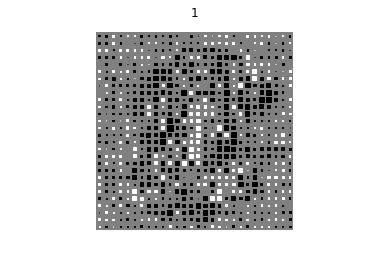

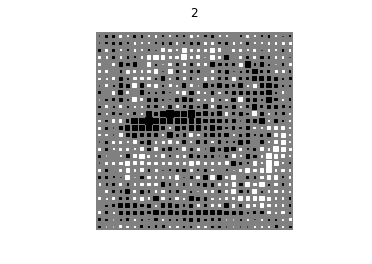

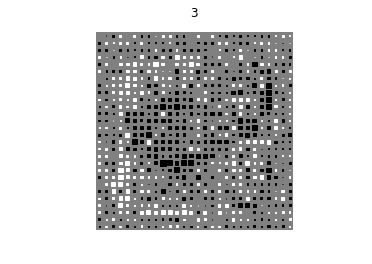

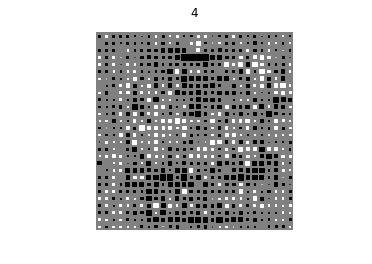

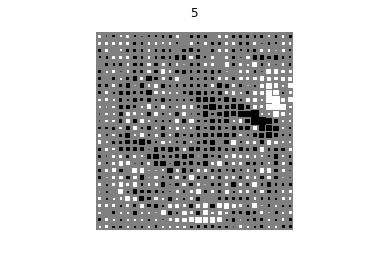

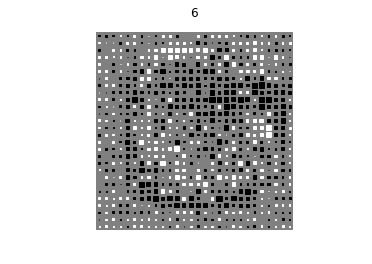

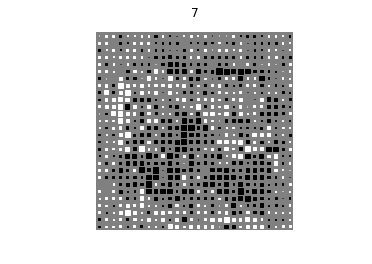

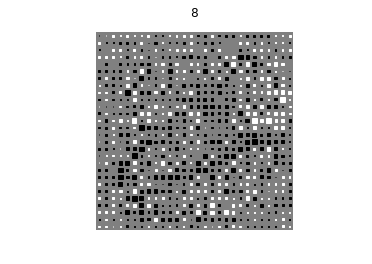

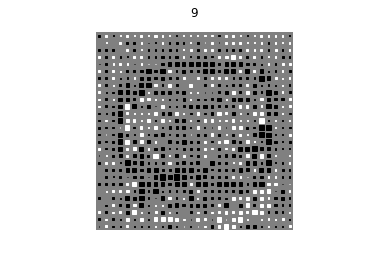

In [10]:
for i in range(10):
    W = m.layers[1].get_weights()[0][:,i].reshape(28,28)
    plt.figure()
    hinton(W)
    s = "%d" %i
    plt.title(s)
    plt.show()

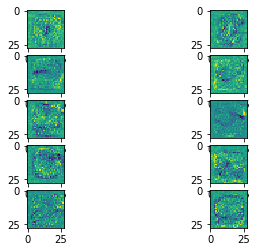

In [13]:
i = 0;
fig, axes = plt.subplots(nrows = 5, ncols = 2)
for ax in axes.flat:
    W = m.layers[1].get_weights()[0][:,i].reshape(28,28)
    ax.imshow(W)
    i = i+1



# Conclusion
The "Hiton" visualization of the weights is not very different from just imshow on the weights (but it is more precise, and easy to explain). The templates I obtain are by far not as convincing as thouse from the lecture.